# Enron Fraud Dataset 安隆公司詐欺案資料集
data from [3rd_ML100Marathon Midterm](https://www.kaggle.com/c/3rd-ml100marathon-midterm/overview "Kaggle").  
+ **This is not offical data.**  
Just a exam from the lesson whitch I joined. And **I'm still doing this project.**  

----

# Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

train = pd.read_csv('./3rd-ml100marathon-midterm/train_data.csv')
test = pd.read_csv('./3rd-ml100marathon-midterm/test_features.csv')

In [2]:
print(train.shape)
train.head()

(113, 22)


,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 22 columns):
name                         113 non-null object
bonus                        61 non-null float64
deferral_payments            28 non-null float64
deferred_income              34 non-null float64
director_fees                13 non-null float64
email_address                83 non-null object
exercised_stock_options      81 non-null float64
expenses                     73 non-null float64
from_messages                65 non-null float64
from_poi_to_this_person      65 non-null float64
from_this_person_to_poi      65 non-null float64
loan_advances                2 non-null float64
long_term_incentive          49 non-null float64
other                        69 non-null float64
poi                          113 non-null bool
restricted_stock             82 non-null float64
restricted_stock_deferred    10 non-null float64
salary                       73 non-null float64
shared_receipt_wi

In [5]:
data = pd.concat([train, test], 0)
data.reset_index(inplace=True, drop=True)

In [7]:
#fix the columns sequence
data = data[['name', 'email_address',
             'deferral_payments', 'deferred_income', 'director_fees', 'loan_advances', 'long_term_incentive',
             'salary', 'bonus', 'expenses', 'other', 'total_payments',
             'restricted_stock', 'restricted_stock_deferred', 'exercised_stock_options', 'total_stock_value',
             'from_messages', 'to_messages', 'from_poi_to_this_person', 'from_this_person_to_poi','shared_receipt_with_poi', 'poi']]
data.head()

,name,email_address,deferral_payments,deferred_income,director_fees,loan_advances,long_term_incentive,salary,bonus,expenses,...,restricted_stock,restricted_stock_deferred,exercised_stock_options,total_stock_value,from_messages,to_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,poi
0,RICE KENNETH D,ken.rice@enron.com,NaN,-3504386.0,NaN,NaN,1617011.0,420636.0,1750000.0,46950.0,...,2748364.0,NaN,19794175.0,22542539.0,18.0,905.0,42.0,4.0,864.0,True
1,SKILLING JEFFREY K,jeff.skilling@enron.com,NaN,NaN,NaN,NaN,1920000.0,1111258.0,5600000.0,29336.0,...,6843672.0,NaN,19250000.0,26093672.0,108.0,3627.0,88.0,30.0,2042.0,True
2,SHELBY REX,rex.shelby@enron.com,NaN,-4167.0,NaN,NaN,NaN,211844.0,200000.0,22884.0,...,869220.0,NaN,1624396.0,2493616.0,39.0,225.0,13.0,14.0,91.0,True
3,KOPPER MICHAEL J,michael.kopper@enron.com,NaN,NaN,NaN,NaN,602671.0,224305.0,800000.0,118134.0,...,985032.0,NaN,NaN,985032.0,NaN,NaN,NaN,NaN,NaN,True
4,CALGER CHRISTOPHER F,christopher.calger@enron.com,NaN,-262500.0,NaN,NaN,375304.0,240189.0,1250000.0,35818.0,...,126027.0,NaN,NaN,126027.0,144.0,2598.0,199.0,25.0,2188.0,True


# Preprocessing and EDA

First look at our target.  
`poi`

Text(True, 15, '11.504%')

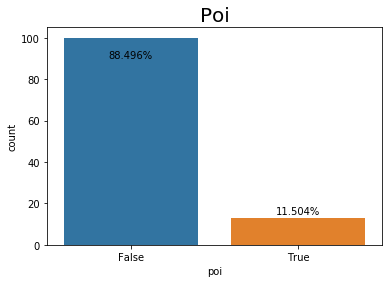

In [8]:
sns.countplot(data['poi'])
total = data['poi'].notnull().sum()
a = (data['poi'] ==False).sum()
b = (data['poi'] ==True).sum()
plt.title('Poi', fontsize=20)
plt.text(False, 90, '{:.3%}'.format(a/total), ha='center', fontsize=10)
plt.text(True, 15, '{:.3%}'.format(b/total), ha='center', fontsize=10)

----

### Data check
Payment : `total_payments` = `bonus`+`deferral_payments`+`(deferred_income)`+`director_fees`+`expenses` +`long_term_incentive`+`other`+`salary`+`loan_advances`  

Stock : `total_stock_value` = `restricted_stock`+`(restricted_stock_deferred)`+`exercised_stock_options`

Independence : `name`,`from_messages`,`from_poi_to_this_person`,`from_this_person_to_poi`,`shared_receipt_with_poi`,`to_messages`  
`email_address`,`poi`

###### `Payment`

In [11]:
#I believe the NaN here is because of there's no money activity, so fill with 0.
clearn_col = ['deferral_payments', 'deferred_income', 'director_fees', 'loan_advances', 'long_term_incentive',
             'salary', 'bonus', 'expenses', 'other', 'total_payments']
for col in clearn_col:
    data[col] = data[col].fillna(0)

In [12]:
data['money_clearn'] = data['total_payments']-(data['bonus']+data['deferral_payments']+data['deferred_income']+data['director_fees']\
+data['expenses']+data['long_term_incentive']+data['other']+data['salary']+data['loan_advances'])

data[data['money_clearn'] !=0].T

,50,139
name,BELFER ROBERT,BHATNAGAR SANJAY
email_address,NaN,sanjay.bhatnagar@enron.com
deferral_payments,-102500,0
deferred_income,0,0
director_fees,3285,137864
loan_advances,0,0
long_term_incentive,0,0
salary,0,0
bonus,0,0
expenses,0,0


I had checked raw data and found wrong input with the data[50].  
On the other hand, data[139] doesn't have raw data but it's eazy to fix the value to be correct data.

In [13]:
#Fix the data[50].
data['deferred_income'][50] = -102500
data['deferral_payments'][50] = 0
data['director_fees'][50] = 102500
data['total_payments'][50] = 3285
data['exercised_stock_options'][50] = 0
data['expenses'][50] = 3285
data['restricted_stock'][50] = 44093
data['restricted_stock_deferred'][50] = -44093
data['total_stock_value'][50] = 0

#Fix the data[139]
data['total_stock_value'][139] = data['total_payments'][139].copy()
data['total_payments'][139] = data['other'][139].copy()
data['director_fees'][139] = 0
data['restricted_stock_deferred'][139] = data['restricted_stock'][139].copy()
data['restricted_stock'][139] = data['exercised_stock_options'][139].copy()
data['exercised_stock_options'][139] = data['total_stock_value'][139].copy()

# #Check again.
data['money_clearn'] = data['total_payments']-(data['bonus']+data['deferral_payments']+data['deferred_income']+data['director_fees']\
+data['expenses']+data['long_term_incentive']+data['other']+data['salary']+data['loan_advances'])
data[data['money_clearn'] !=0]

,name,email_address,deferral_payments,deferred_income,director_fees,loan_advances,long_term_incentive,salary,bonus,expenses,...,restricted_stock_deferred,exercised_stock_options,total_stock_value,from_messages,to_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,poi,money_clearn


###### `Stock`

In [14]:
#The same reason to fill stock category.
clearn_col = ['restricted_stock', 'restricted_stock_deferred', 'exercised_stock_options', 'total_stock_value']
for col in clearn_col:
    data[col] = data[col].fillna(0)

In [15]:
data['stock_clean'] = data['total_stock_value'] - (data['restricted_stock']+data['restricted_stock_deferred']+data['exercised_stock_options'])
data[data['stock_clean'] !=0]

,name,email_address,deferral_payments,deferred_income,director_fees,loan_advances,long_term_incentive,salary,bonus,expenses,...,exercised_stock_options,total_stock_value,from_messages,to_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,poi,money_clearn,stock_clean


###### `Others`
I'm not sure the message from these feature.  
Since there's already 0 value inside, it's better to fill -999 or any other values.  
Ofcourse dont move our target `'poi'`.

In [16]:
clearn_col = ['from_messages', 'to_messages', 'from_poi_to_this_person', 'from_this_person_to_poi','shared_receipt_with_poi']
for col in clearn_col:
    data[col] = data[col].fillna(-1)

----

#### `email_address`

In [17]:
data['email_address'].str.split('@', expand=True).head()

,0,1
0,ken.rice,enron.com
1,jeff.skilling,enron.com
2,rex.shelby,enron.com
3,michael.kopper,enron.com
4,christopher.calger,enron.com


In [18]:
data['email_address'] = data['email_address'].str.split('@', expand=True)[0]
data['email_address'].str.split('.', expand=True).head()

,0,1,2
0,ken,rice,None
1,jeff,skilling,None
2,rex,shelby,None
3,michael,kopper,None
4,christopher,calger,None


In [19]:
data['email_address'].str.split('.', expand=True).nunique()

0     78
1    110
2      3
dtype: int64

In [20]:
data['email_address'] = data['email_address'].str.split('.', expand=True)[0]

In [21]:
data['email_address'] = data['email_address'].fillna('None')

In [22]:
pd.crosstab(data['email_address'], data['poi']).T.style.background_gradient(cmap='summer_r')

email_address,None,a,adam,andrew,ben,bill,bob,brian,charlene,chip,christopher,cindy,dan,danny,david,dick,diomedes,elizabeth,frank,gene,george,greg,james,janet,jay,jeff,jeffrey,jere,jeremy,joe,john,joseph,julia,keith,ken,kenneth,kevin,kulvinder,larry,lou,louise,mark,marty,matthew,michael,mike,mitchell,paula,phillip,rebecca,rex,richard,rick,rob,robert,rockford,rod,s,sally,scott,steven,terence,thomas,tracy,vicki,vince,w,wes
poi,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,30,1,1,0,0,1,1,1,1,1,0,1,1,1,2,1,1,1,1,1,2,2,2,1,1,0,1,1,1,1,3,1,1,1,1,0,1,1,1,1,1,2,1,1,2,1,1,0,1,1,0,2,2,1,2,1,1,1,1,0,2,1,1,1,1,1,1,0
True,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


Just get the key word whitch is useful to our model.  

----

In [23]:
#Check missing data
missing = pd.DataFrame({'missing':data.isnull().sum(),
                       'nunique':data.nunique()}).sort_values(by='missing', ascending=False)
missing

,missing,nunique
poi,33,2
name,0,146
email_address,0,79
money_clearn,0,1
shared_receipt_with_poi,0,84
from_this_person_to_poi,0,42
from_poi_to_this_person,0,58
to_messages,0,87
from_messages,0,65
total_stock_value,0,125


In [ ]:
# g = sns.PairGrid(data[['exercised_stock_options', 'expenses','from_messages', 'from_poi_to_this_person',
#                     'from_this_person_to_poi','loan_advances', 'long_term_incentive', 'other', 'restricted_stock',
#                     'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi','to_messages', 'total_payments',
#                     'total_stock_value']])
# g = g.map_diag(plt.hist, edgecolor='w')
# g = g.map_offdiag(plt.scatter, edgecolor='w')

In [44]:
fix_col = ['deferred_income', 'restricted_stock_deferred']
#features whitch is negative value.
for col in fix_col:
    data[col] = data[col].apply(lambda x: -np.log(-x) if x<0 else x)

In [45]:
log_col = ['bonus', 'deferral_payments',
       'director_fees', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other',
       'restricted_stock', 'salary', 'shared_receipt_with_poi',
       'to_messages', 'total_payments', 'total_stock_value',
       'money_clearn', 'stock_clean']
for col in log_col:
    data[col] = data[col].apply(lambda x: np.log(x) if x>0 else x)

In [24]:
#Label ['email_address']
data['email_address'] = data['email_address'].astype('category').cat.codes

In [46]:
#Set train and test datasets
train = data[data['poi'].notnull()]

test = data[data['poi'].isnull()]
test.reset_index(inplace=True, drop=True)

In [47]:
#Label ['poi']
train['poi'] = train['poi'].apply(lambda x: 0 if x==False else 1)

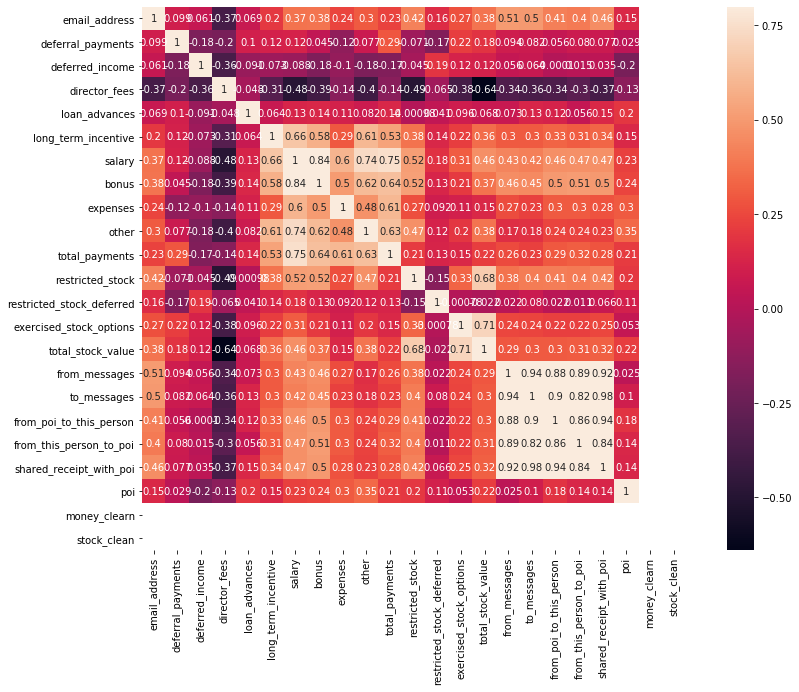

In [50]:
plt.figure(figsize=(15,10))
h = train.corr()
sns.heatmap(h, vmax=0.8, annot=True, square=True)

## Model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

### LogisticRegression

In [ ]:
#basic
lr = LogisticRegression()
lr.fit(train.iloc[:, 1:21], train['poi'])
cross_val_score(lr, train.iloc[:, 1:21], train['poi'], cv=5).mean()

In [ ]:
#GridSearch
param_grid = {'C':np.logspace(-3,3,7),
             'penalty':['l1','l2']}
grid_search = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_result = grid_search.fit(train.iloc[:, 1:21], train['poi'])

print('Best Accuracy : {}\nUsing {}'.format(grid_result.best_score_, grid_result.best_params_))

In [57]:
#hyper
lr = LogisticRegression(C=10, penalty='l1')
lr.fit(train.iloc[:, 1:21], train['poi'])
cross_val_score(lr, train.iloc[:, 1:21], train['poi'], cv=5).mean()

0.8944664031620555

### RandomForestClassifier

In [ ]:
#basic
rf = RandomForestClassifier(random_state=42)
rf.fit(train.iloc[:, 1:21], train['poi'])
cross_val_score(rf, train.iloc[:, 1:21], train['poi'], cv=5).mean()

In [ ]:
#GridSearch
param_grid={'n_estimators':[100, 500, 1000],
           'max_depth':[3, 6, 8],
           'min_samples_split':[2, 5, 10],
           'min_samples_leaf':[1, 2, 4]}
gridsearch = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_result = gridsearch.fit(train.iloc[:, 1:21], train['poi'])

print('Best Accuracy : {}\nUsing {}'.format(grid_result.best_score_, grid_result.best_params_))

In [61]:
#hyper
rf = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=1, 
                            max_depth=3, random_state=42)
rf.fit(train.iloc[:, 1:21], train['poi'])
cross_val_score(rf, train.iloc[:, 1:21], train['poi'], cv=5).mean()

0.8849802371541502

>**Feature Importances**

In [ ]:
pd.DataFrame(rf.feature_importances_, index=list(train.columns[1:21]), columns=['Importances']).sort_values(by='Importances',ascending=False)\
.tail()

### GradientBoostingClassifier

In [ ]:
#basic
gb = GradientBoostingClassifier(random_state=42)
gb.fit(train.iloc[:, 1:21], train['poi'])
cross_val_score(gb, train.iloc[:, 1:21], train['poi'], cv=5).mean()

GridSearch cost too much times, try RandomSearch.

In [ ]:
# # GridSearch
# param_grid = {'learning_rate':[0.1, 0.3, 0.5],
#              'n_estimators':[100, 200, 300],
#              'subsample':[1.0, 0.5, 0.3, 0.1],
#              'min_samples_split':[2, 5, 10],
#              'min_samples_leaf':[1, 2, 4],
#              'max_depth':[3, 6, 8],
#              'tol':[0.01, 0.05, 0.1]}
# gridsearch = GridSearchCV(gb, param_grid, n_jobs=-1, verbose=1)
# grid_result = gridsearch.fit(train.iloc[:, 1:21], train['poi'])

# print('Best Accuracy : {}\nUsing {}'.format(grid_result.best_score_, grid_result.best_params_))

In [ ]:
#RandomSearch
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'learning_rate':[0.1, 0.3, 0.5],
             'n_estimators':[100, 200, 300],
             'subsample':[1.0, 0.5, 0.3, 0.1],
             'min_samples_split':[2, 5, 10],
             'min_samples_leaf':[1, 2, 4],
             'max_depth':[3, 6, 8],
             'tol':[0.01, 0.05, 0.1]}
random_search = RandomizedSearchCV(gb, param_grid, n_iter=20, cv=5, iid=False)
random_result = random_search.fit(train.iloc[:, 1:21], train['poi'])

print('Best Accuracy : {}\nUsing {}'.format(random_result.best_score_, random_result.best_estimator_))

In [ ]:
#hyper
gb = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=0.5, tol=0.1,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
gb.fit(train.iloc[:, 1:21], train['poi'])
cross_val_score(gb, train.iloc[:, 1:21], train['poi'], cv=5).mean()

>**Feature Importances**

In [ ]:
pd.DataFrame(gb.feature_importances_, index=list(train.columns[1:21]), columns=['Importances']).sort_values(by='Importances',ascending=False)\
.tail()

### XGB

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(train.iloc[:, 1:21], train['poi'])
cross_val_score(xgb, train.iloc[:, 1:21], train['poi'], cv=5).mean()

In [ ]:
#GridSearch
param_grid = {'n_estimators':[100, 200, 300],
              'min_child_weight':[1, 5, 10],
             'gamma':[0.5, 1, 1.5, 2, 5],
             'subsample':[0.6, 0.8, 1.0],
             'max_depth':[3, 4, 5]}
gridsearch = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_result = gridsearch.fit(train.iloc[:,1:21], train['poi'])
print('Best Accuracy : {}\nUsing {}'.format(grid_result.best_score_, grid_result.best_params_) )

In [ ]:
#hyper
xgb = XGBClassifier(gamma=1.5, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0)
xgb.fit(train.iloc[:, 1:21], train['poi'])
cross_val_score(xgb, train.iloc[:, 1:21], train['poi'], cv=5).mean()

>**Feature Importances**

In [ ]:
pd.DataFrame(xgb.feature_importances_, index=list(train.columns[1:21]), columns=['Importances']).sort_values(by='Importances',ascending=False)\
.head(10)

### LightGBM

In [29]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(objective='binary')
lgbm.fit(train.iloc[:, 1:21], train['poi'])
cross_val_score(lgbm, train.iloc[:, 1:21], train['poi'], cv=5).mean()

0.8581027667984189

In [ ]:
#GridSearch
param_grid = {'max_depth':[3, 4, 5],
              'num_leaves':[5, 15, 30],
             'learning_rate':[0.03, 0.05, 0.1],
             'n_estimators':[100, 200, 500, 1000],
             'subsample':[0.3, 0.5, 0.8, 1.0],
             'colsample_bytree':[0.3, 0.5, 0.8, 1.0]}
grid_search = GridSearchCV(lgbm, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_result = grid_search.fit(train.iloc[:, 1:21], train['poi'])
print('Best Accuracy :{}\nUsing {}'.format(grid_result.best_score_, grid_result.best_params_) )

In [ ]:
#hyper
lgbm = LGBMClassifier(objective='binary', learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.5)
lgbm.fit(train.iloc[:, 1:21], train['poi'])
cross_val_score(lgbm, train.iloc[:, 1:21], train['poi'], cv=5).mean()

In [52]:
#hyper2
lgbm = LGBMClassifier(objective='binary', learning_rate=0.03, max_depth=3, num_leaves=5, n_estimators=100, subsample=0.3, colsample_bytree=0.5)
lgbm.fit(train.iloc[:, 1:21], train['poi'])
cross_val_score(lgbm, train.iloc[:, 1:21], train['poi'], cv=5).mean()

0.8762845849802371

In [31]:
pd.DataFrame(lgbm.feature_importances_, index=list(train.columns[1:21]), columns=['Importances']).sort_values(by='Importances',ascending=False)

,Importances
other,77
expenses,46
restricted_stock,33
salary,31
total_stock_value,28
shared_receipt_with_poi,23
total_payments,17
email_address,16
exercised_stock_options,14
deferred_income,11


----
## For submit

In [69]:
#hyper2
y_predLGBM = lgbm.predict_proba(test.iloc[:, 1:21])[:, 1]
y_predLGBM

array([0.42261851, 0.11094124, 0.55824161, 0.1533982 , 0.5063893 ,
       0.23248715, 0.4889303 , 0.01313796, 0.1420959 , 0.06599406,
       0.01799666, 0.00936076, 0.0105971 , 0.0104296 , 0.59282577,
       0.01062537, 0.0610855 , 0.27088621, 0.04824012, 0.01124572,
       0.38306839, 0.41743581, 0.04532137, 0.03749103, 0.03250684,
       0.01456041, 0.09769609, 0.03941368, 0.27617707, 0.06428037,
       0.01391121, 0.19986643, 0.23194713])

In [ ]:
y_pred = lgbm.predict_proba(test.iloc[:, 1:21])[:, 1]
y_pred

In [ ]:
y_pred = xgb.predict_proba(test.iloc[:, 1:21])[:, 1]
y_pred

In [ ]:
y_pred = gb.predict_proba(test.iloc[:, 1:21])[:,1]
y_pred

In [70]:
y_predRF = rf.predict_proba(test.iloc[:, 1:21])[:,1]
y_predRF

array([0.20274263, 0.2775872 , 0.34489533, 0.19092791, 0.25503522,
       0.26119636, 0.6258222 , 0.0135698 , 0.14192445, 0.02330097,
       0.0957141 , 0.01740651, 0.03004163, 0.00976027, 0.33926455,
       0.01249281, 0.06377366, 0.20558976, 0.13772666, 0.01172035,
       0.81418679, 0.31734716, 0.07850284, 0.02568748, 0.03322441,
       0.03034485, 0.28650491, 0.02401106, 0.16322176, 0.28543857,
       0.01321409, 0.07642264, 0.34874505])

In [71]:
y_predLR = lr.predict_proba(test.iloc[:, 1:21])[:,1]
y_predLR

array([9.53591499e-01, 9.97773055e-01, 9.99074437e-01, 8.63226634e-03,
       9.99817775e-01, 5.91267772e-03, 9.99888517e-01, 3.14782772e-13,
       9.96679559e-01, 9.60455565e-03, 4.25295106e-18, 1.76508426e-03,
       4.38213969e-01, 2.21542661e-11, 4.81001650e-04, 1.22409366e-07,
       1.76672241e-04, 9.67298230e-01, 5.58670097e-04, 2.65927434e-15,
       8.74834757e-01, 9.65334648e-01, 3.17143872e-02, 1.28052023e-15,
       1.17026293e-02, 7.69651926e-16, 7.12707486e-14, 9.72621316e-05,
       2.72446803e-01, 1.18020230e-06, 1.02167870e-14, 1.37743946e-03,
       9.89706795e-01])

## Blending

In [72]:
y_pred = y_predLGBM *0.67 + y_predRF * 0.03 + y_predLR * 0.30

In [74]:
submit = pd.DataFrame({'name':test['name'],
                     'poi':y_pred})
submit

,name,poi
0,BELDEN TIMOTHY N,0.575314
1,BOWEN JR RAYMOND M,0.381990
2,HANNON KEVIN P,0.684091
3,DELAINEY DAVID W,0.111094
4,CAUSEY RICHARD A,0.646877
5,HICKERSON GARY J,0.165376
6,FREVERT MARK A,0.646325
7,CHAN RONNIE,0.009210
8,DONAHUE JR JEFFREY M,0.398466
9,REYNOLDS LAWRENCE,0.047796


In [75]:
submit.to_csv('Kaggle_test_HWblending.csv', index=False)